In [1]:
import cv2
import numpy as np
from skimage import morphology, feature
import matplotlib.pyplot as plt

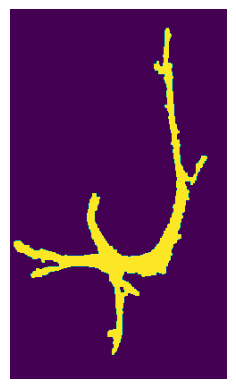

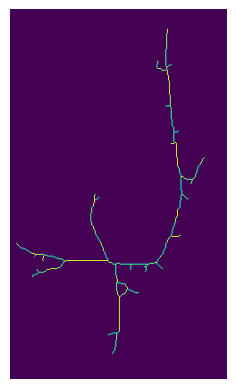

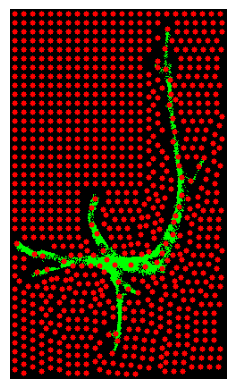

In [20]:
# Load the binary mask image
image = cv2.imread('2022.05.25_3s_4.1_Image 1_z23_ch2-coloc_method-Mean_part-All.tif')
# image = cv2.imread('test2.png')
b, g, r = cv2.split(image)
binary_image = np.where(g == 255, 255, 0).astype(np.uint8)

binary_image = cv2.dilate(binary_image, np.ones((5, 5), np.uint8) , iterations=1)
binary_image = cv2.erode(binary_image, np.ones((3, 3), np.uint8) , iterations=1)

# binary_image = cv2.bitwise_not(binary_image)

plt.imshow(binary_image)
plt.axis('off')
plt.show()

# Skeletonize the binary image
skeleton = morphology.skeletonize(binary_image) # image need to be WHITE image on BLACK background 
# print(type(skeleton))
plt.imshow(skeleton)
plt.axis('off')
plt.show()


# Find endpoints in the skeletonized image
endpoints = feature.corner_peaks(feature.corner_harris(skeleton), min_distance=5)

# Overlay endpoints on the original image (optional)
# image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for endpoint in endpoints:
    cv2.circle(image, tuple(endpoint[::-1]), 3, (255, 0, 0), -1)

# Display the image with endpoints
# cv2.imshow('Endpoints', image_color)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(image)
plt.axis('off')
plt.show()